In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# task2.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации
import numpy as np

def sigmoid(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def deriv_sigmoid(x):
    return 1 - sigmoid(x) * sigmoid(x)

def mae_loss(y_true, y_pred):
  return (abs(y_true - y_pred) ).mean()

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
        for x, y_true in zip(data, all_y_trues):
            # --- Do a feedforward (we'll need these values later)
            sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
            h1 = sigmoid(sum_h1)

            sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
            h2 = sigmoid(sum_h2)

            sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
            o1 = sigmoid(sum_o1)
            y_pred = o1

            # --- Calculate partial derivatives.
            # --- Naming: d_L_d_w1 represents "partial L / partial w1"
            d_L_d_ypred = -2 * (y_true - y_pred)

            # Neuron o1
            d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
            d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
            d_ypred_d_b3 = deriv_sigmoid(sum_o1)

            d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
            d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

            # Neuron h1
            d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
            d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
            d_h1_d_b1 = deriv_sigmoid(sum_h1)

            # Neuron h2
            d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
            d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
            d_h2_d_b2 = deriv_sigmoid(sum_h2)

            # --- Update weights and biases
            # Neuron h1
            self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
            self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
            self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

            # Neuron h2
            self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
            self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
            self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

            # Neuron o1
            self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
            self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
            self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss_mse = mse_loss(all_y_trues, y_preds)
                loss_mae = mae_loss(all_y_trues, y_preds)
                print("Epoch %d loss_mse: %.5f loss_mae: %.5f" % (epoch, loss_mse,loss_mae))


data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
  
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-0.3333,-0.27778]) # 128 pounds, 63 inches
frank = np.array([0.3417,0.13889])  # 155 pounds, 68 inches
print("Emily: %.6f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.6f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss_mse: 0.98755 loss_mae: 0.99376
Epoch 0 loss_mse: 0.99045 loss_mae: 0.99521
Epoch 0 loss_mse: 0.99259 loss_mae: 0.99628
Epoch 0 loss_mse: 0.61944 loss_mae: 0.74636
Epoch 10 loss_mse: 0.50051 loss_mae: 0.55574
Epoch 10 loss_mse: 0.50020 loss_mae: 0.55577
Epoch 10 loss_mse: 0.49998 loss_mae: 0.55576
Epoch 10 loss_mse: 0.49972 loss_mae: 0.55452
Epoch 20 loss_mse: 0.49124 loss_mae: 0.53465
Epoch 20 loss_mse: 0.49083 loss_mae: 0.53458
Epoch 20 loss_mse: 0.49043 loss_mae: 0.53469
Epoch 20 loss_mse: 0.49036 loss_mae: 0.53380
Epoch 30 loss_mse: 0.47272 loss_mae: 0.51643
Epoch 30 loss_mse: 0.47061 loss_mae: 0.51571
Epoch 30 loss_mse: 0.46831 loss_mae: 0.51584
Epoch 30 loss_mse: 0.46830 loss_mae: 0.51387
Epoch 40 loss_mse: 0.05117 loss_mae: 0.22056
Epoch 40 loss_mse: 0.04345 loss_mae: 0.17915
Epoch 40 loss_mse: 0.04320 loss_mae: 0.16088
Epoch 40 loss_mse: 0.03303 loss_mae: 0.15502
Epoch 50 loss_mse: 0.00585 loss_mae: 0.05918
Epoch 50 loss_mse: 0.00584 loss_mae: 0.05613
Epoch 50 loss_

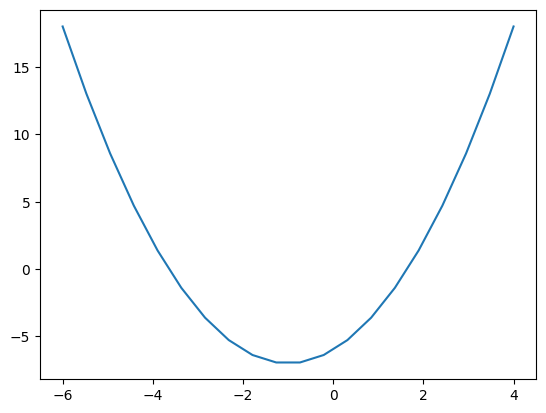

In [10]:
# task2.5. Реализовать экстемумы через градиентный спуск: x**2+2x-6

# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(-6, 4, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 + 2 * plot_x1 - 6)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()


In [11]:
# Функция градиента
def dJ(x):
    return 2 * x + 2

# Функция потерь
def J(x):
    return (x ** 2 + 2 * x - 6)

x = 0.0
# Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
# Скорость обучения
learn_rate = 0.1
# Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)

    # Если итерация достигнута точно, расчет завершен
    if abs(J(x)-J(last_x))<0.0000000001 :
        break

history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна -1.0


In [1]:
# task2.6. Запустить DL2.CNN с различными параметрами функции активации (sigmoid), 
# количеством фильтров и количеством эпох (от 1 до 4)

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.listdir("../input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
# read train 
train = pd.read_csv("../input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# read test 
test= pd.read_csv("../input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

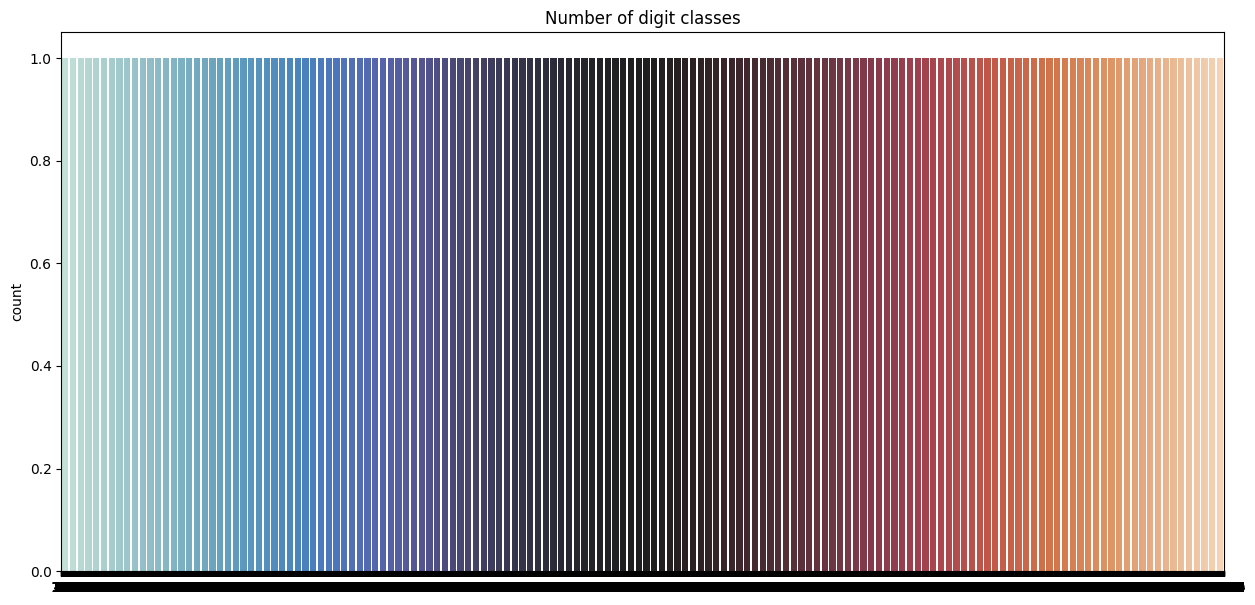

In [8]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [ ]:
# plot some samples
img = X_train.iloc[0].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [ ]:
# plot some samples
img = X_train.iloc[3].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [7]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [11]:
# Label Encoding 
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [37]:
# 
from sklearn.metrics import confusion_matrix
import itertools


# from keras.models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam, SGD
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# activasion https://keras.io/api/layers/activations/

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [40]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [41]:
# optimizer https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml
# loss https://keras.io/api/losses/
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [42]:
epochs = 4  # for better result increase the epochs
batch_size = 250

In [43]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [44]:
# Fit the model

history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size)
                                , epochs = epochs
                                , validation_data = (X_val,Y_val)
                                , steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/4
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.2047 - loss: 2.2383 - val_accuracy: 0.7981 - val_loss: 0.7671
Epoch 2/4
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6200 - loss: 1.1826 - val_accuracy: 0.8021 - val_loss: 0.7593
Epoch 3/4
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6346 - loss: 1.0734 - val_accuracy: 0.9012 - val_loss: 0.3831
Epoch 4/4
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.7781 - val_accuracy: 0.9005 - val_loss: 0.3825


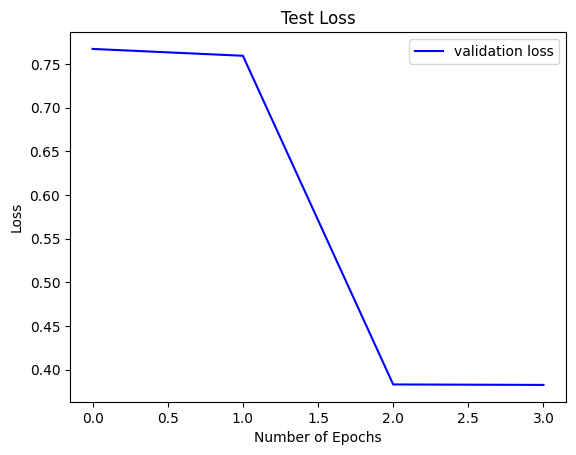

In [45]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


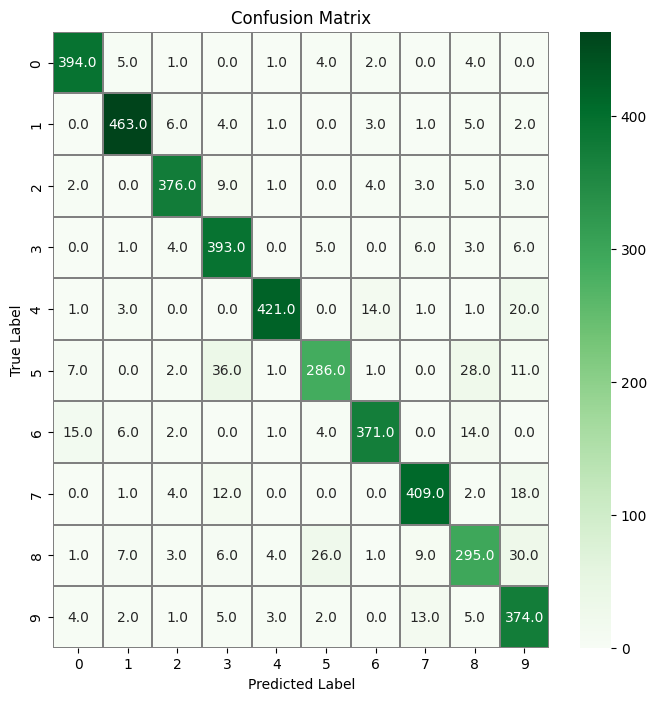

In [46]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()